In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy import stats
import os

# Import API key
import win32api
from api_keys import api_key

#chech the api key
if api_key=="your key here!":
    win32api.MessageBox(0, 'open api_keys.py, write you api key and restart the kernal', 'Api reminder')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if (city not in cities) & (len(cities)<620):
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
#Perform a weather check on each city using a series of successive API calls.
#prepare the url and params
url="http://api.openweathermap.org/data/2.5/weather?"
params={"appid":api_key,"units":"imperial"}

#lists to hold each city data
cityd=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
record=1
count=0
n=1
print("Beginning Data Retrieval\n-----------------------------")

#loop through the cities 
for city in cities:
    params["q"]=city
    start=time.time()
    
    #check number of records and get json response
    if record<50: 
        response=requests.get(url,params=params).json()
        
        #check each city data and save it in a list
        try:
            print(f"Processing Record {record} of Set {n}| {city}")
            record=record+1
            response=requests.get(url,params=params).json()
            process_time=start+time.time()
            count=count+1
            country.append(response['sys']['country'])
            cloudiness.append(response['clouds']['all'])
            date.append(response['dt'])
            cityd.append(city)
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
        except:
            print("City not found. Skipping...")
        #calculate the process time
        process_time=time.time()-start
    #set sleep time so it won't exceed 50 record in a minut
    else:
        time.sleep(60-process_time)
        record=0
        n=n+1
   # if count>110:
    #    break

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| laguna
Processing Record 2 of Set 1| bengkulu
City not found. Skipping...
Processing Record 3 of Set 1| amudat
Processing Record 4 of Set 1| albany
Processing Record 5 of Set 1| hobart
Processing Record 6 of Set 1| temerloh
Processing Record 7 of Set 1| hithadhoo
Processing Record 8 of Set 1| ushtobe
Processing Record 9 of Set 1| hualmay
Processing Record 10 of Set 1| bluff
Processing Record 11 of Set 1| saskylakh
Processing Record 12 of Set 1| husavik
Processing Record 13 of Set 1| paciran
Processing Record 14 of Set 1| hayden
Processing Record 15 of Set 1| coquimbo
Processing Record 16 of Set 1| taolanaro
City not found. Skipping...
Processing Record 17 of Set 1| inderborskiy
City not found. Skipping...
Processing Record 18 of Set 1| rikitea
Processing Record 19 of Set 1| mahebourg
Processing Record 20 of Set 1| nikolskoye
Processing Record 21 of Set 1| sampit
Processing Record 22 of Set 1| kapaa
Pro

Processing Record 33 of Set 4| geraldton
Processing Record 34 of Set 4| olinda
Processing Record 35 of Set 4| avarua
Processing Record 36 of Set 4| ust-kamchatsk
City not found. Skipping...
Processing Record 37 of Set 4| kamenskoye
City not found. Skipping...
Processing Record 38 of Set 4| meyungs
City not found. Skipping...
Processing Record 39 of Set 4| raudeberg
Processing Record 40 of Set 4| santa fe
Processing Record 41 of Set 4| yanji
Processing Record 42 of Set 4| samusu
City not found. Skipping...
Processing Record 43 of Set 4| rawannawi
City not found. Skipping...
Processing Record 44 of Set 4| victoria
Processing Record 45 of Set 4| ilulissat
Processing Record 46 of Set 4| cabedelo
Processing Record 47 of Set 4| port macquarie
Processing Record 48 of Set 4| ola
Processing Record 49 of Set 4| arraial do cabo
Processing Record 0 of Set 5| dikson
Processing Record 1 of Set 5| te anau
Processing Record 2 of Set 5| cockburn town
Processing Record 3 of Set 5| vestmannaeyjar
Process

Processing Record 25 of Set 8| sao filipe
Processing Record 26 of Set 8| kloulklubed
Processing Record 27 of Set 8| banjarmasin
Processing Record 28 of Set 8| cumbum
Processing Record 29 of Set 8| asmar
Processing Record 30 of Set 8| bilma
Processing Record 31 of Set 8| lake charles
Processing Record 32 of Set 8| rongcheng
Processing Record 33 of Set 8| mahaicony
City not found. Skipping...
Processing Record 34 of Set 8| kirksville
Processing Record 35 of Set 8| jaleswar
Processing Record 36 of Set 8| morro bay
Processing Record 37 of Set 8| grand gaube
Processing Record 38 of Set 8| artvin
Processing Record 39 of Set 8| miles city
Processing Record 40 of Set 8| zirandaro
Processing Record 41 of Set 8| zhigansk
Processing Record 42 of Set 8| tulsipur
Processing Record 43 of Set 8| berlevag
Processing Record 44 of Set 8| kiama
Processing Record 45 of Set 8| faanui
Processing Record 46 of Set 8| camacari
Processing Record 47 of Set 8| xining
Processing Record 48 of Set 8| mapiripan
Proce

Processing Record 17 of Set 12| berck
Processing Record 18 of Set 12| mandera
Processing Record 19 of Set 12| pedro ii
Processing Record 20 of Set 12| fortuna foothills
Processing Record 21 of Set 12| verkhoyansk
Processing Record 22 of Set 12| nikki
Processing Record 23 of Set 12| kinshasa
Processing Record 24 of Set 12| mithi
Processing Record 25 of Set 12| khonuu
City not found. Skipping...
Processing Record 26 of Set 12| mandalgovi
Processing Record 27 of Set 12| portobelo
Processing Record 28 of Set 12| urdzhar
City not found. Skipping...
Processing Record 29 of Set 12| ornskoldsvik
Processing Record 30 of Set 12| jackson
Processing Record 31 of Set 12| eskisehir
Processing Record 32 of Set 12| haifa
Processing Record 33 of Set 12| isabela
Processing Record 34 of Set 12| canutama
Processing Record 35 of Set 12| non sung
Processing Record 36 of Set 12| barmer
Processing Record 37 of Set 12| mareeba
Processing Record 38 of Set 12| payson
Processing Record 39 of Set 12| mudyuga
City 

In [4]:
#check length of each list
print("city      ",len(cityd),"\ncloudiness",len(cloudiness),"\ncountry   ",len(country),
      "\ndate      ",len(date),"\nhumidity  ",len(humidity),"\nlat       ",len(lat),"\nlng       ",len(lng),
      "\nmax_temp  ",len(max_temp),"\nwind_speed",len(wind_speed))


city       536 
cloudiness 536 
country    536 
date       536 
humidity   536 
lat        536 
lng        536 
max_temp   536 
wind_speed 536


In [5]:
#Export the city data into a .csv.
city_table=pd.DataFrame({"City":cityd,
                         "Cloudiness":cloudiness,
                         "Country":country,
                         "Date":date,
                         "Humidity":humidity,
                         "Lat":lat,
                         "Lng":lng,
                         "Max Temp":max_temp,
                         "Wind Speed":wind_speed})
#Display the DataFrame
city_table.head()
city_table.to_csv("city_table/table.xlsx")

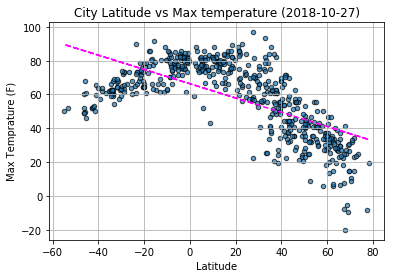

In [6]:
#plot latitude vs max temperature
lat_temp=city_table.plot(kind="scatter",x="Lat",y="Max Temp",grid=True,facecolor="blue",alpha=0.7,edgecolor="black",
               title=f"City Latitude vs Max temperature ({datetime.datetime.today().strftime('%Y-%m-%d')})")
lat_temp.set_xlabel("Latitude")
lat_temp.set_ylabel("Max Temprature (F)")

#linear regression of the data
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(
    city_table["Lat"],city_table["Max Temp"])
aa_fit = aa_slope * city_table["Lat"] + aa_int
lat_temp=plt.plot(city_table["Lat"],aa_fit,"--",color="magenta")

#Save the plotted figures as .pngs.
plt.savefig("Images/lat_temp.png")

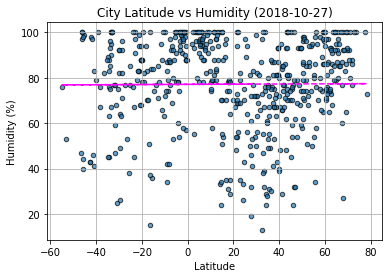

In [7]:
#plot latitude vs humidity
lat_humidity=city_table.plot(kind="scatter",x="Lat",y="Humidity",grid=True,facecolor="blue",alpha=0.7,edgecolor="black",
               title=f"City Latitude vs Humidity ({datetime.datetime.today().strftime('%Y-%m-%d')})")
lat_humidity.set_xlabel("Latitude")
lat_humidity.set_ylabel("Humidity (%)")

#linear regression of the data
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(
    city_table["Lat"],city_table["Humidity"])
h_fit = aa_slope * city_table["Lat"] + aa_int
lat_temp=plt.plot(city_table["Lat"],h_fit,"--",color="magenta")

#Save the plotted figures as .pngs.
plt.savefig("Images/lat_humidity.png")

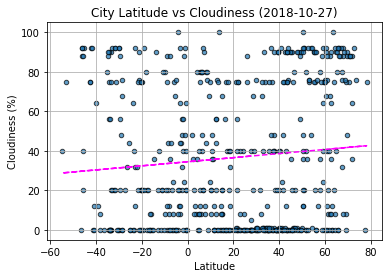

In [8]:
#plot latitude vs cloudiness
lat_cloud=city_table.plot(kind="scatter",x="Lat",y="Cloudiness",grid=True,facecolor="blue",alpha=0.7,edgecolor="black",
               title=f"City Latitude vs Cloudiness ({datetime.datetime.today().strftime('%Y-%m-%d')})")
lat_cloud.set_xlabel("Latitude")
lat_cloud.set_ylabel("Cloudiness (%)")

#linear regression of the data
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(
    city_table["Lat"],city_table["Cloudiness"])
aa_fit = aa_slope * city_table["Lat"] + aa_int
lat_temp=plt.plot(city_table["Lat"],aa_fit,"--",color="magenta")

#Save the plotted figures as .pngs.
plt.savefig("Images/lat_cloud.png")

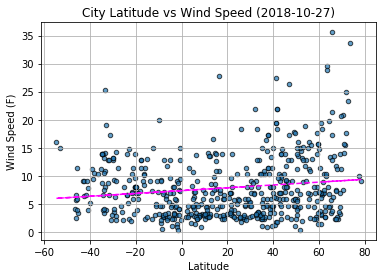

In [9]:
#plot latitude vs wind speed
lat_wind=city_table.plot(kind="scatter",x="Lat",y="Wind Speed",grid=True,facecolor="blue",alpha=0.7,edgecolor="black",marker="o",
               title=f"City Latitude vs Wind Speed ({datetime.datetime.today().strftime('%Y-%m-%d')})")
lat_wind.set_xlabel("Latitude")
lat_wind.set_ylabel("Wind Speed (F)")

#linear regression of the data
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(
    city_table["Lat"],city_table["Wind Speed"])
aa_fit = aa_slope * city_table["Lat"] + aa_int
lat_temp=plt.plot(city_table["Lat"],aa_fit,"--",color="magenta")

#Save the plotted figures as .pngs.
plt.savefig("Images/lat_wind.png")